In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("city.csv")
data

,City,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,Ahmedabad,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00
1,Ahmedabad,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77
2,Ahmedabad,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25
3,Ahmedabad,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00
4,Ahmedabad,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78
...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73
29527,Visakhapatnam,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38
29528,Visakhapatnam,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00
29529,Visakhapatnam,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   NO2      25946 non-null  float64
 2   NOx      25346 non-null  float64
 3   NH3      19203 non-null  float64
 4   CO       27472 non-null  float64
 5   SO2      25677 non-null  float64
 6   O3       25509 non-null  float64
 7   Benzene  23908 non-null  float64
 8   Toluene  21490 non-null  float64
 9   Xylene   11422 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.3+ MB


In [4]:
data.describe()

,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000
mean,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128
std,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247
min,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000
25%,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000
50%,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000
75%,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000
max,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000


In [5]:
data.isnull().sum()

City           0
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
dtype: int64

In [6]:
nomean=data["NO2"].mean()
data["NO2"].fillna(nomean,inplace=True)
noxmean=data["NOx"].mean()
data["NOx"].fillna(noxmean,inplace=True)
nhmean=data["NH3"].mean()
data["NH3"].fillna(nhmean,inplace=True)
cmean=data["CO"].mean()
data["CO"].fillna(cmean,inplace=True)
smean=data["SO2"].mean()
data["SO2"].fillna(smean,inplace=True)
omean=data["O3"].mean()
data["O3"].fillna(omean,inplace=True)
bmean=data["Benzene"].mean()
data["Benzene"].fillna(bmean,inplace=True)
tmean=data["Toluene"].mean()
data["Toluene"].fillna(tmean,inplace=True)
xmean=data["Xylene"].mean()
data["Xylene"].fillna(xmean,inplace=True)

In [7]:
data.isnull().sum()

City       0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
dtype: int64

<Axes: xlabel='count', ylabel='City'>

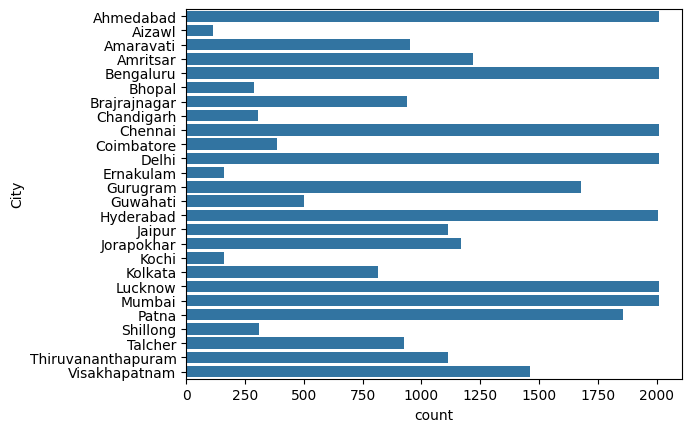

In [8]:
sns.countplot(data['City'])

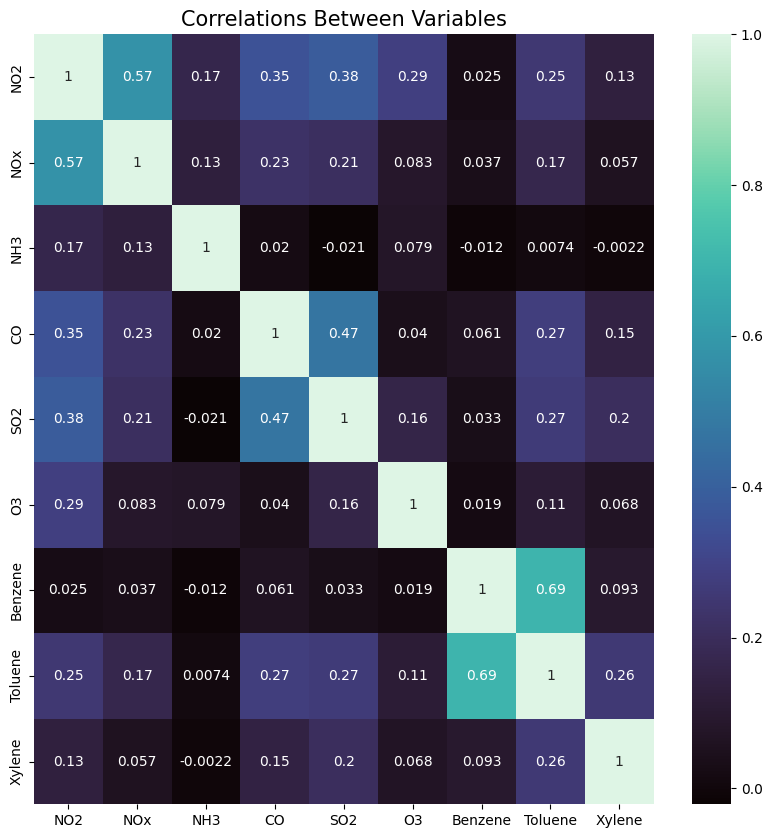

In [9]:
df=data.drop("City",axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="mako")
plt.title("Correlations Between Variables",size=15)
plt.show()

In [10]:
x=data.drop("City",axis=1)
y=data["City"]

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

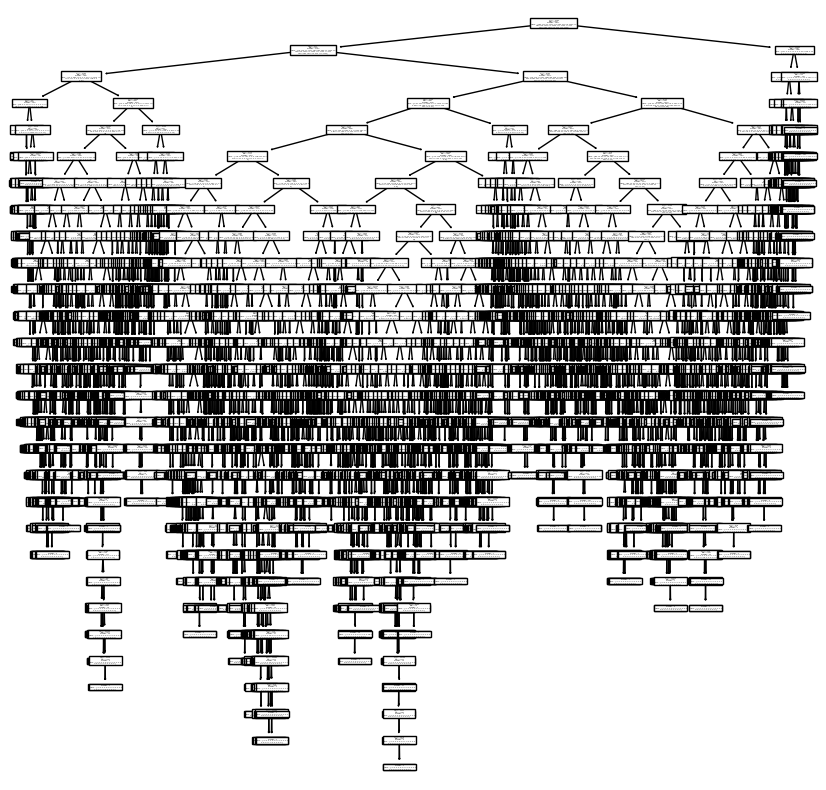

In [12]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model)
plt.show()

In [13]:
pred = model.predict(x)
pred

array(['Ahmedabad', 'Ahmedabad', 'Ahmedabad', ..., 'Visakhapatnam',
       'Visakhapatnam', 'Visakhapatnam'], dtype=object)

In [14]:
pred= model.predict(x)
df =pd.DataFrame({'Actual': y, 'Predicted':pred})
df

,Actual,Predicted
0,Ahmedabad,Ahmedabad
1,Ahmedabad,Ahmedabad
2,Ahmedabad,Ahmedabad
3,Ahmedabad,Ahmedabad
4,Ahmedabad,Ahmedabad
...,...,...
29526,Visakhapatnam,Visakhapatnam
29527,Visakhapatnam,Visakhapatnam
29528,Visakhapatnam,Visakhapatnam
29529,Visakhapatnam,Visakhapatnam


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, pred))

[[2009    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  113    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [  55    0  896    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [  33    0    0 1188    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0 2007    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   9    0    0    0    0  280    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [ 146    0    0    0    0    0  792    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  304    0    0    

In [16]:
print(classification_report(y, pred))

                    precision    recall  f1-score   support

         Ahmedabad       0.67      1.00      0.81      2009
            Aizawl       1.00      1.00      1.00       113
         Amaravati       1.00      0.94      0.97       951
          Amritsar       1.00      0.97      0.99      1221
         Bengaluru       1.00      1.00      1.00      2009
            Bhopal       1.00      0.97      0.98       289
      Brajrajnagar       1.00      0.84      0.92       938
        Chandigarh       1.00      1.00      1.00       304
           Chennai       1.00      0.99      0.99      2009
        Coimbatore       1.00      0.99      1.00       386
             Delhi       1.00      1.00      1.00      2009
         Ernakulam       1.00      0.98      0.99       162
          Gurugram       1.00      0.96      0.98      1679
          Guwahati       1.00      1.00      1.00       502
         Hyderabad       1.00      0.99      0.99      2006
            Jaipur       1.00      0.99